# **Irrigation Water Requirement Prediction**

## **Importing Libraries**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
print("Environment ready")

Environment ready


In [33]:
import sys
sys.executable


'c:\\Users\\Admin\\Desktop\\Irrigation Water Requirement Prediction\\.venv\\Scripts\\python.exe'

In [34]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 200)

sns.set_theme(style="whitegrid")

## **Load the Dataset**

In [ ]:
df = pd.read_csv("../data/irrigation_prediction.csv")
df.head(10)

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
5,Silt,5.10,20.50,0.37,1.43,33.34,62.51,402.92,7.03,13.55,Rice,Sowing,Zaid,Sprinkler,Groundwater,7.56,Yes,7.33,East,Medium
6,Sandy,7.44,22.70,0.59,2.95,28.02,58.50,764.95,7.08,7.38,Rice,Flowering,Kharif,Sprinkler,Reservoir,2.18,No,51.47,West,Medium
7,Sandy,7.68,40.23,0.62,3.30,35.60,79.10,833.33,5.17,3.73,Wheat,Vegetative,Zaid,Rainfed,Reservoir,12.54,Yes,118.96,West,Low
8,Clay,5.42,36.73,0.74,1.52,16.59,76.88,2476.03,10.34,1.80,Maize,Flowering,Kharif,Sprinkler,Rainwater,13.75,Yes,107.25,Central,Low
9,Loamy,6.26,19.58,0.36,1.67,31.14,74.30,1474.55,8.53,17.68,Rice,Vegetative,Rabi,Rainfed,Reservoir,1.27,Yes,97.92,Central,Medium


## **Basic Inspection**

In [36]:
print("Shape:", df.shape)
df.info()

Shape: (10000, 20)
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  str    
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  str    
 11  Crop_Growth_Stage        10000 non-null  str    
 12  Season                   10000 non-null  str    
 13  Irrigation_Type          10000 non-null  str    
 14  Water_Source   

In [37]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [38]:
# Checking for missing values
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

Series([], dtype: int64)

## **Descriptive Statistics**

In [39]:
#Numeric columns summary
df.describe()


,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Field_Area_hectare,Previous_Irrigation_mm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.487857,36.969207,0.944731,1.791963,26.991423,60.080339,1252.499420,7.518538,10.163545,7.598024,59.864122
std,0.979963,16.430845,0.372406,0.984202,8.664074,20.187973,715.582201,2.016077,5.670923,4.233919,34.483722
min,4.800000,8.000000,0.300000,0.100000,12.000000,25.000000,0.380000,4.000000,0.500000,0.300000,0.020000
25%,5.640000,22.860000,0.620000,0.940000,19.460000,42.855000,634.155000,5.760000,5.160000,3.950000,30.160000
50%,6.470000,37.240000,0.950000,1.780000,27.090000,60.040000,1250.335000,7.560000,10.190000,7.540000,59.630000
75%,7.350000,50.940000,1.260000,2.650000,34.500000,77.705000,1880.265000,9.260000,15.100000,11.202500,90.030000
max,8.200000,65.000000,1.600000,3.500000,42.000000,95.000000,2499.690000,11.000000,20.000000,15.000000,119.990000


In [40]:
# Numeric describe with heatmap colors
desc = df.describe().T  # transpose for readability
desc.style.background_gradient(cmap="viridis").format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
Soil_pH,10000.00,6.49,0.98,4.80,5.64,6.47,7.35,8.20
Soil_Moisture,10000.00,36.97,16.43,8.00,22.86,37.24,50.94,65.00
Organic_Carbon,10000.00,0.94,0.37,0.30,0.62,0.95,1.26,1.60
Electrical_Conductivity,10000.00,1.79,0.98,0.10,0.94,1.78,2.65,3.50
Temperature_C,10000.00,26.99,8.66,12.00,19.46,27.09,34.50,42.00
Humidity,10000.00,60.08,20.19,25.00,42.86,60.04,77.70,95.00
Rainfall_mm,10000.00,1252.50,715.58,0.38,634.15,1250.34,1880.26,2499.69
Sunlight_Hours,10000.00,7.52,2.02,4.00,5.76,7.56,9.26,11.00
Wind_Speed_kmh,10000.00,10.16,5.67,0.50,5.16,10.19,15.10,20.00
Field_Area_hectare,10000.00,7.60,4.23,0.30,3.95,7.54,11.20,15.00


In [41]:
# Interactive Table using Plotly (Scrollable + Zoom)
desc = df.describe().T.round(3)
desc.insert(0, "Feature", desc.index)

fig = go.Figure(
    data=[go.Table(
        header=dict(values=list(desc.columns)),
        cells=dict(values=[desc[col] for col in desc.columns])
    )]
)

fig.update_layout(title="Interactive df.describe() (Numeric Features)")
fig.show()

In [42]:
# Best of Both Worlds (Styled + Highlight Min/Max)
desc = df.describe().T

desc.style\
    .background_gradient(cmap="coolwarm")\
    .highlight_max(color="lightgreen")\
    .highlight_min(color="lightcoral")\
    .format("{:.2f}")


,count,mean,std,min,25%,50%,75%,max
Soil_pH,10000.00,6.49,0.98,4.80,5.64,6.47,7.35,8.20
Soil_Moisture,10000.00,36.97,16.43,8.00,22.86,37.24,50.94,65.00
Organic_Carbon,10000.00,0.94,0.37,0.30,0.62,0.95,1.26,1.60
Electrical_Conductivity,10000.00,1.79,0.98,0.10,0.94,1.78,2.65,3.50
Temperature_C,10000.00,26.99,8.66,12.00,19.46,27.09,34.50,42.00
Humidity,10000.00,60.08,20.19,25.00,42.86,60.04,77.70,95.00
Rainfall_mm,10000.00,1252.50,715.58,0.38,634.15,1250.34,1880.26,2499.69
Sunlight_Hours,10000.00,7.52,2.02,4.00,5.76,7.56,9.26,11.00
Wind_Speed_kmh,10000.00,10.16,5.67,0.50,5.16,10.19,15.10,20.00
Field_Area_hectare,10000.00,7.60,4.23,0.30,3.95,7.54,11.20,15.00


In [43]:
# Categorical columns summary
df.describe(include="string")


,Soil_Type,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Mulching_Used,Region,Irrigation_Need
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,6,4,3,4,4,2,5,3
top,Sandy,Rice,Harvest,Rabi,Sprinkler,River,No,South,Low
freq,2536,1711,2581,3383,2527,2528,5013,2102,5864


In [44]:
# Separate Numeric vs Categorical Columns

target_col = "Irrigation_Need"

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["string"]).columns.tolist()

if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print("Target:", target_col)
print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)

Target: Irrigation_Need
Numeric cols: ['Soil_pH', 'Soil_Moisture', 'Organic_Carbon', 'Electrical_Conductivity', 'Temperature_C', 'Humidity', 'Rainfall_mm', 'Sunlight_Hours', 'Wind_Speed_kmh', 'Field_Area_hectare', 'Previous_Irrigation_mm']
Categorical cols: ['Soil_Type', 'Crop_Type', 'Crop_Growth_Stage', 'Season', 'Irrigation_Type', 'Water_Source', 'Mulching_Used', 'Region']


## **EDA**

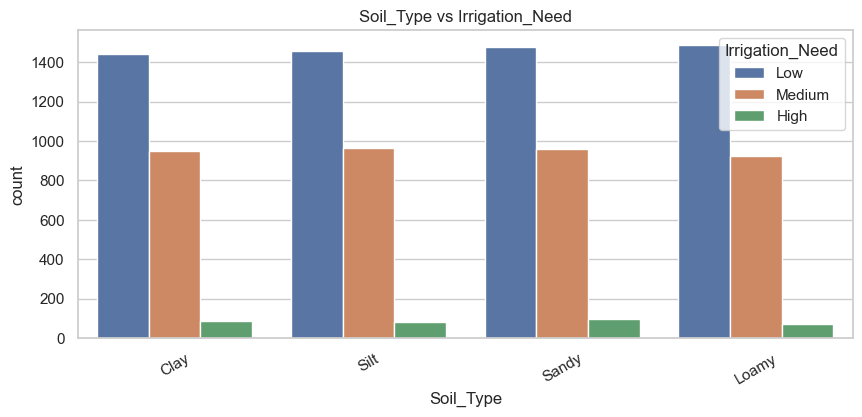

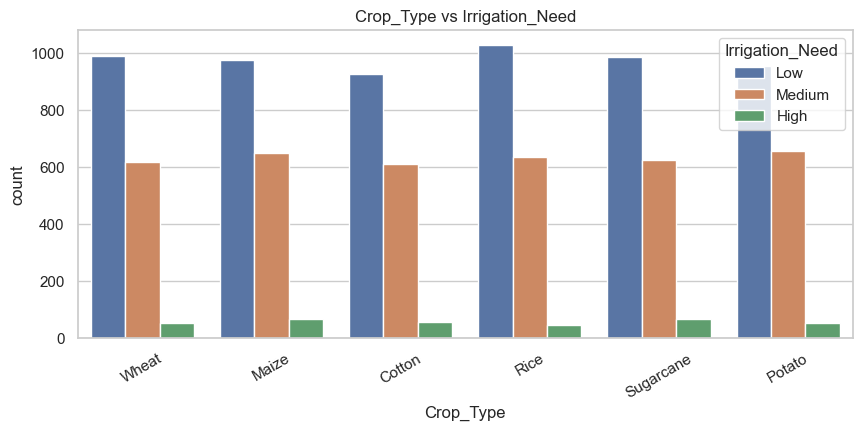

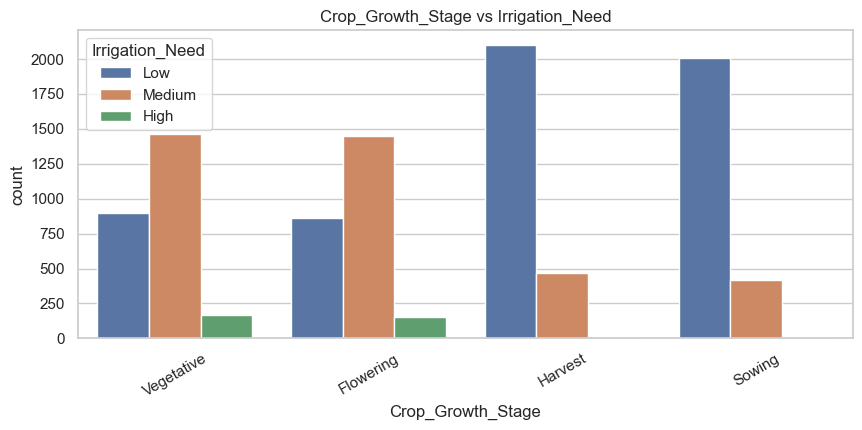

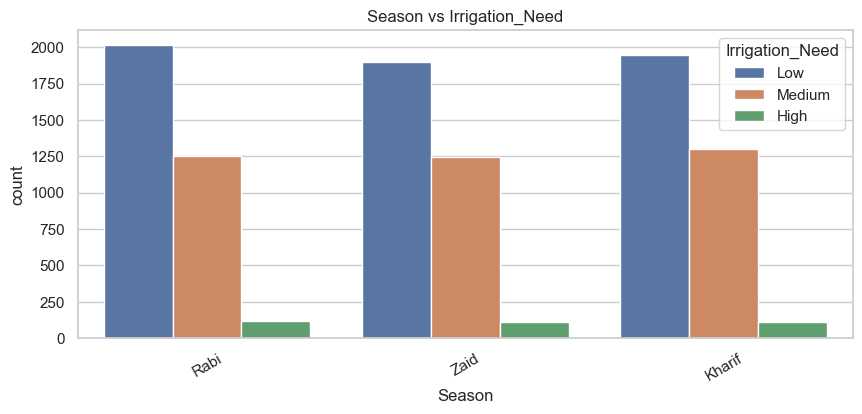

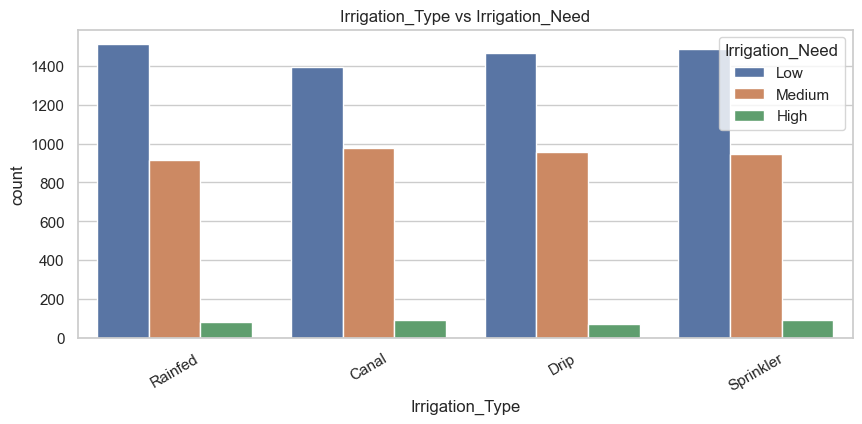

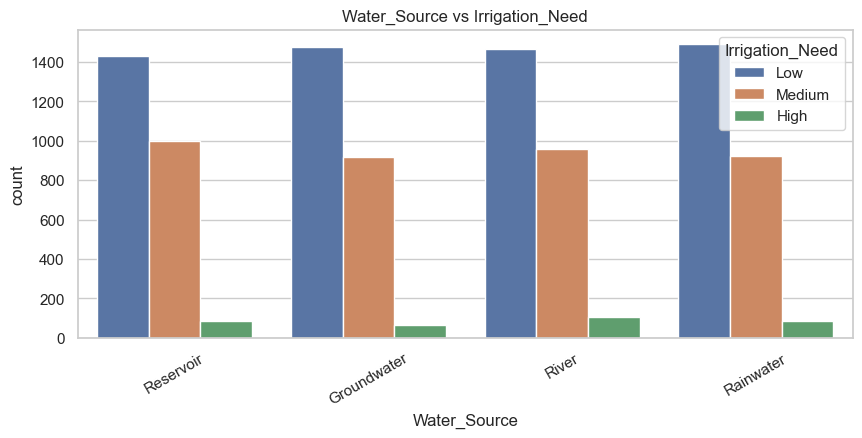

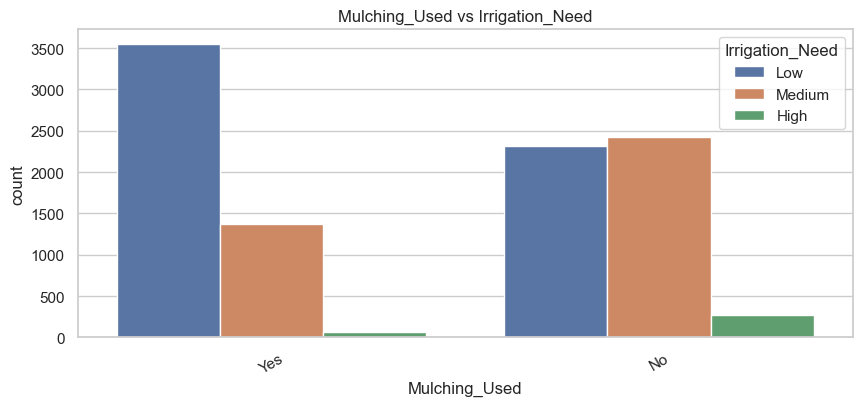

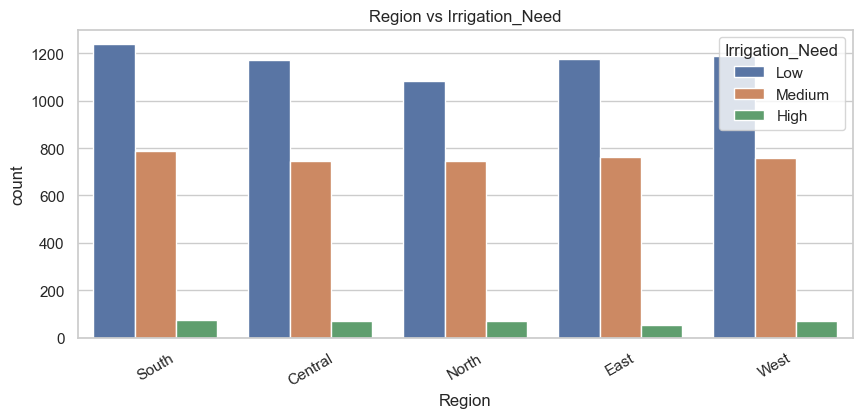

In [52]:
# Countplots with target hue
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, hue=target_col)
    plt.xticks(rotation=30)
    plt.title(f"{col} vs Irrigation_Need")
    plt.show()


## **CORRELATION ANALYSIS**

### *Correlation Heatmap (Numeric Only)*

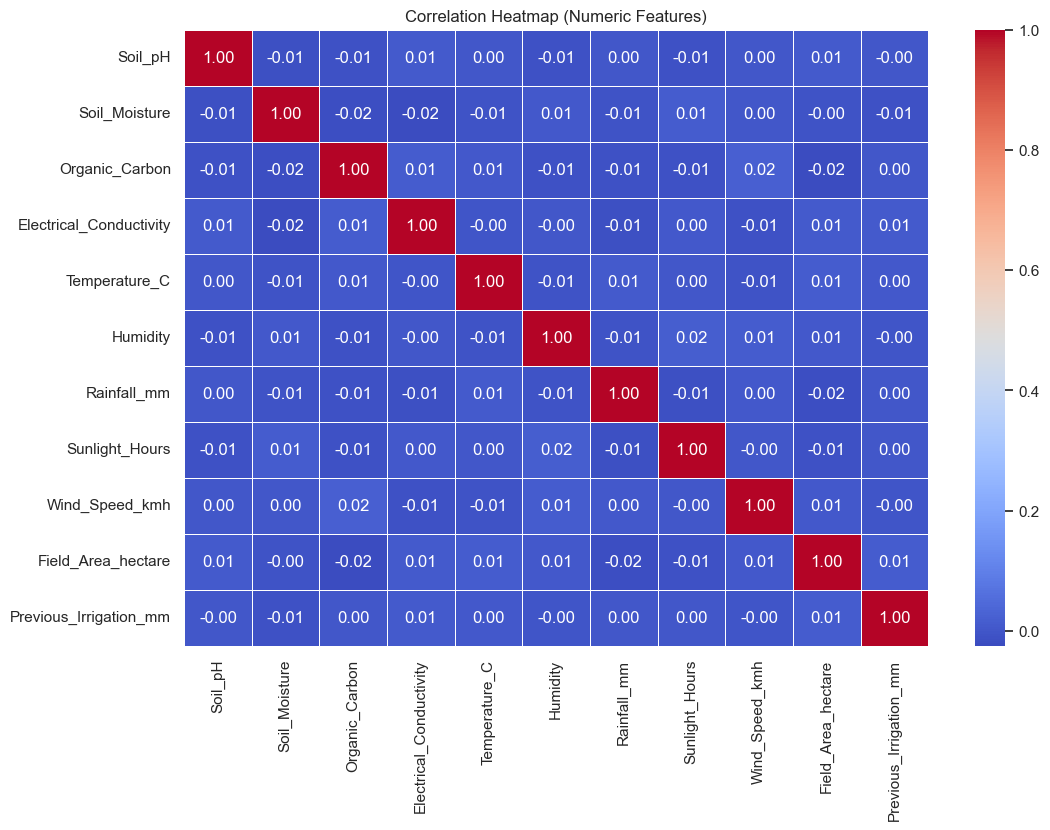

In [53]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


### *Interactive Plotly Heatmap (Numeric)*

In [54]:
fig = px.imshow(
    corr,
    text_auto=".2f",
    aspect="auto",
    title="Interactive Correlation Heatmap (Numeric Features)"
)
fig.show()


### *Advanced Correlation Heatmap Including Encoded Categoricals*

In [55]:
# Label Encode Categoricals

from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoders = {}

for col in categorical_cols + [target_col]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

df_encoded.head()


,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,5,3,1,2,2,4.73,1,1.98,3,1
1,3,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,1,0,2,0,0,12.22,1,33.56,0,2
2,2,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,0,1,1,1,2,5.52,1,34.62,3,1
3,0,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,5,2,0,0,2,1.43,1,84.03,2,2
4,0,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,0,2,2,0,3,2.52,0,60.86,3,2


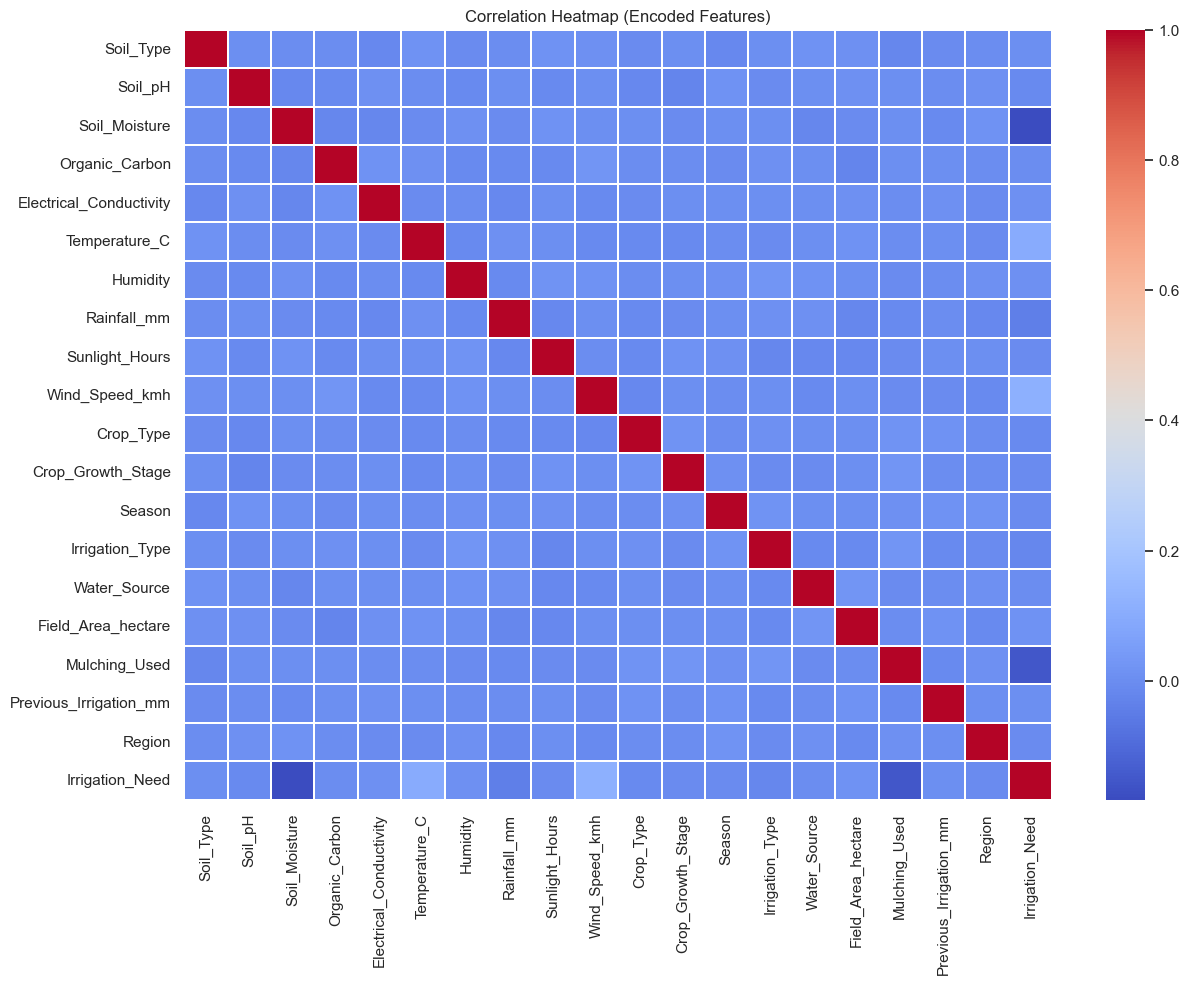

In [56]:
# Heatmap with all features

corr_all = df_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_all, cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()


In [57]:
# Interactive version

fig = px.imshow(
    corr_all,
    aspect="auto",
    title="Interactive Heatmap (Encoded Features)"
)
fig.show()
